## Part 2: Build a Simple Neural Network with PyTorch

In this notebook, we will start to build a very simply neural network with PyTorch to get a taste of what PyTorch can help in deep learning. The dataset we will use is MNIST from torchvision package. 

We will go through the following step by step: 
* [Load a dataset](#loadadataset)
* [Explore the dataset](#exploredataset)
* [Build a Neural Network with PyTorch](#buildnetwork)

In [21]:
# import important library
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F

from torchvision import datasets, transforms, models

# for graphing
import helper

<a id = 'loadadataset'></a>
## Load a Dataset

We will get a dataset (example: MNIST) from torchvision package as a starter to build a simple neural network.

In [4]:
# Define a transform to normalize the data 
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])])

# Download the training and testing dataset
# trainset
trainset = datasets.MNIST('MNIST_data/', download = True, train = True, transform = transform)
testset = datasets.MNIST('MNIST_data/', download= True, train = False, transform = transform)

# load the training and testing dataset 
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

Processing...
Done!


<a id = 'exploredataset'></a>
## Explore the Dataset

We will take a look at how the image is stored by exploring images size, structure and plot 

In [6]:
# check the size of trainloader
print("train set size: ", len(trainloader))
print("test set size: ",len(testloader))

train set size:  938
test set size:  157


In [7]:
# grab image from trainloader
dataiter = iter(trainloader).next()
images, labels = dataiter

In [8]:
# check the len of dataiter. 
# it's 2 tensor. One is for images, one is for labels
len(dataiter)

2

In [9]:
# check the size of the images
# there are 64 images per batch, 1 color, 28 * 28 pixel each
images.size()

torch.Size([64, 1, 28, 28])

In [10]:
# there are 64 images labels per batch
len(labels)

64

What's the input size? One input is one image. Each image has 28 * 28 pixel, that's 784 pixel total for one image. Therefore, each input size is 784.  

In [12]:
# we can calculate it
images.shape[2] * images.shape[3]

784

We have the training data loaded into trainloader and we make that an iterator with iter(trainloader). We'd use this to loop through the dataset for training, but here I'm just grabbing the first batch so we can check out the data. We can see below that images is just a tensor with size (64, 1, 28, 28). So, 64 images per batch, 1 color channel, and 28x28 images.

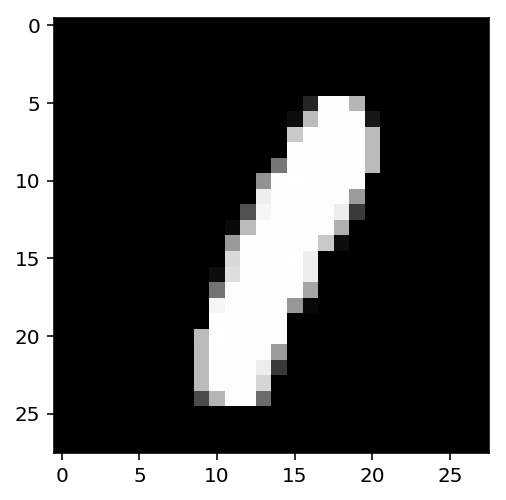

In [20]:
plt.imshow(images[0].numpy().squeeze(), cmap = 'Greys_r')

<a id = 'buildnetwork'></a>
## Build a Simple Neural Network with PyTorch

Here I'll use PyTorch to build a simple feedfoward network to classify the MNIST images. That is, the network will receive a digit image as input and predict the digit in the image.

- [**First method: use torhch.nn module**](#firstmethod)

    To build a neural network with PyTorch, I use the torch.nn module. The network itself is a class inheriting from torch.nn.Module. I define each of the operations separately, like nn.Linear(784, 128) for a fully connected linear layer with 784 inputs and 128 units.

    The class needs to include a forward method that implements the forward pass through the network. In this method, I pass some input tensor x through each of the operations defined earlier. The torch.nn module also has functional equivalents for things like ReLUs in torch.nn.functional. This module is usually imported as F. Then to use a ReLU activation on some layer (which is just a tensor), We'd do F.relu(x). 

    For this network, I'll build it with three fully connected layers, then a softmax output for predicting classes. The softmax function is similar to the sigmoid in that it squashes inputs between 0 and 1, but it's also normalized so that all the values sum to one like a proper probability distribution.


- **[Second method](#secondmethod): we will use PyTorch built-in module: nn.Sequential to simplify the process **

<a id='firstmethod'></a>
### First method: use torhch.nn module###

A. Build the Network Architecture
1. Input size: From the exploration above, we know the image has 784 pixel total. Input size = 784
2. Hidden Layer: We will build a three layers in this model, that's 128, 64, 10. 
3. Activation Function: In each hidden layer, we will use the ReLU activation 
4. Output: We will use softmax output for predicting classes

In [22]:
# first start with own written function 
# actually later on, we know pytorch has built-in module that can help
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # define the layer, 128, 64, 10 because we know the output has 10 digits and predict which one it would be
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        
        # output layer, 10 units - one for each digit 
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x) # this x return a matrix, with 64 by 10. dim = 0 is the 64 batches, dim = 1 refers to the 10 outputs
        x = F.softmax(x, dim=1) # dim = 1 refers to the 10 outputs
    
        return x

model = Network()

# take a look at the model architecture
model

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

B. Initializing weights and biases 

The weights and such are automatically initialized for you, but it's possible to customize how they are initialized. The weights and biases are tensors attached to the layer you defined, you can get them with model.fc1.weight for instance.

In [23]:
# check the weights
print(model.fc1.weight)
print(model.fc1.bias)

Parameter containing:
tensor([[ 9.8745e-03, -4.5884e-03,  8.2393e-03,  ...,  1.3202e-02,
         -2.6832e-02, -6.6535e-04],
        [ 3.1082e-04, -8.3111e-03,  1.5748e-03,  ...,  1.4406e-02,
          2.2264e-02,  2.9671e-02],
        [-3.3401e-02, -8.4824e-03, -2.9416e-02,  ...,  2.0684e-02,
         -8.8618e-03, -1.0315e-02],
        ...,
        [ 3.1504e-02, -2.8848e-02, -3.0997e-02,  ...,  2.5585e-02,
          2.9194e-02, -1.7458e-02],
        [-3.5384e-02,  1.2262e-02,  3.2561e-02,  ..., -3.4627e-02,
         -2.4261e-02, -1.5249e-02],
        [ 2.1611e-02, -1.1055e-02, -2.4977e-04,  ...,  2.8508e-02,
          1.6585e-02, -3.0088e-02]])
Parameter containing:
tensor(1.00000e-02 *
       [ 0.3326,  3.3293,  3.1853, -1.8578, -3.1252, -0.1365,  0.7282,
         2.7746, -3.2191, -0.0871,  0.3965,  2.7765,  2.8955, -0.5823,
        -1.9357, -0.2627, -1.7545, -0.4321, -1.3551,  0.8519,  1.0345,
        -0.6763,  0.5913,  1.7075, -2.1717, -1.4061, -0.1019,  0.6360,
        -3.1706,  2

For custom initialization, we want to modify these tensors in place. These are actually autograd Variables, so we need to get back the actual tensors with model.fc1.weight.data. Once we have the tensors, we can fill them with zeros (for biases) or random normal values.

In [24]:
# Set biases to all zeros
model.fc1.bias.data.fill_(0)

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [25]:
# sample from random normal with standard dev = 0.01
model.fc1.weight.data.normal_(std = 0.01)

tensor([[-2.2492e-03, -1.8367e-03, -1.7801e-03,  ...,  3.7893e-04,
          5.0475e-03, -7.0642e-03],
        [ 2.7050e-03,  1.3903e-02,  1.7600e-02,  ..., -4.5151e-03,
         -1.6980e-02, -1.2187e-02],
        [ 1.8386e-03, -6.1953e-03,  6.7064e-03,  ...,  1.2826e-03,
          6.2323e-03, -1.3290e-03],
        ...,
        [ 1.8654e-02, -7.1839e-04, -2.5530e-03,  ...,  2.7090e-04,
         -5.9473e-03,  4.4911e-03],
        [-2.2728e-02, -4.5721e-04,  1.7787e-02,  ...,  7.1276e-03,
         -7.2244e-03,  4.0436e-06],
        [-5.9211e-03,  2.6129e-02, -1.1892e-02,  ...,  1.1314e-02,
         -1.5624e-02,  1.3175e-02]])

C. Forward pass

Now that we have a network, let's see what happens when we pass in an image. This is called the forward pass. We're going to convert the image data into a tensor, then pass it through the operations defined by the network architecture.

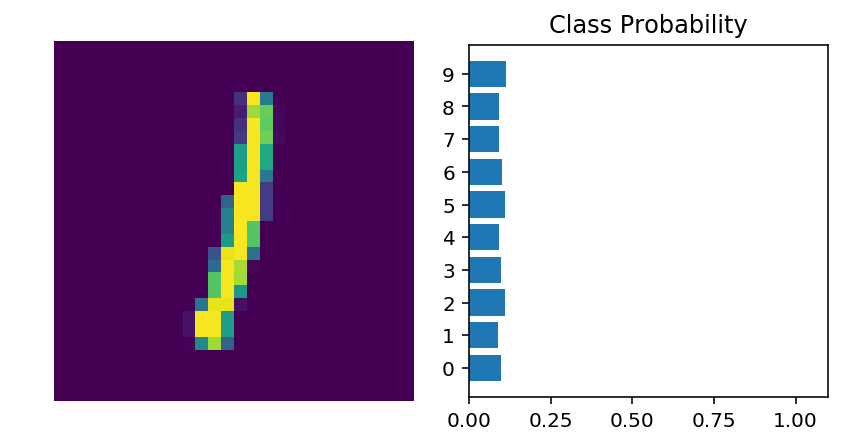

In [26]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(images.shape[0],images.shape[1], images.shape[2]*images.shape[3])

# Forward pass through the network
img_idx = 0
# calculate the first image probability
ps = model.forward(images[img_idx])

# check what images[0] real data looks like
img = images[img_idx]

# see how our model predict for class probability
# noticed that we never trained our model, so our predicted probability is across the board. No prediction at all!
helper.view_classify(img.view(1, 28, 28), ps)

### Important Note: 
As you can see above, our network has basically no idea what this digit is. It's because we haven't trained it yet, all the weights are random!

<a id = 'secondmethod'></a>
### Second method: Pytorch way to build a network without writing our own ###

PyTorch provides a convenient way to build networks like this where a tensor is passed sequentially through operations, nn.Sequential. I will use this to build the equivalent network.

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax()
)


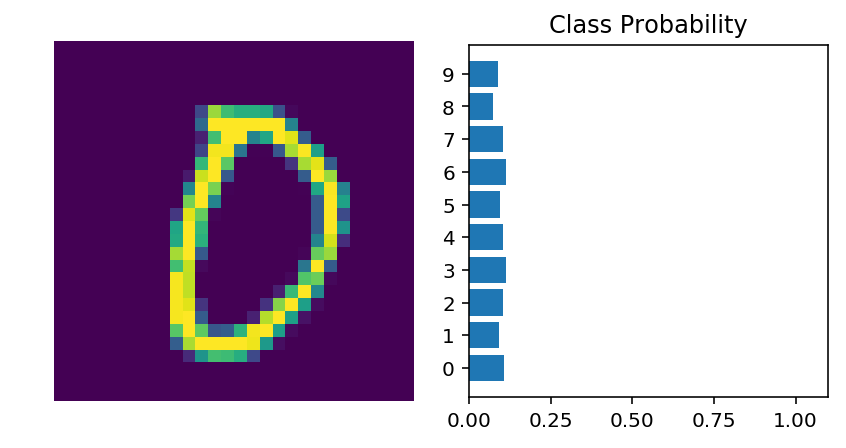

In [27]:
# Define Hyperparameters for our network

input_size = 784 # input_size is each input image, what's their total pixel
hidden_sizes = [128, 64] # the size of the layer we want our network to be
output_size = 10 # final output size, we have 10 digits to predict, so final size is 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))

print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], images.shape[1], images.shape[2]*images.shape[3])
ps = model.forward(images[0])

img = images[0]

# when we use view, we need to convert back to the original format, the image is 28 * 28, so you need to resize it back 
# to 28 * 28
helper.view_classify(images[0].view(1, 28, 28), ps)

Example 2: Use `OrderDict` to build the network

Sequential(
  (fc1): Linear(in_features=784, out_features=400, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=400, out_features=200, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=200, out_features=100, bias=True)
  (relu3): ReLU()
  (output): Linear(in_features=100, out_features=10, bias=True)
  (softmax): Softmax()
)


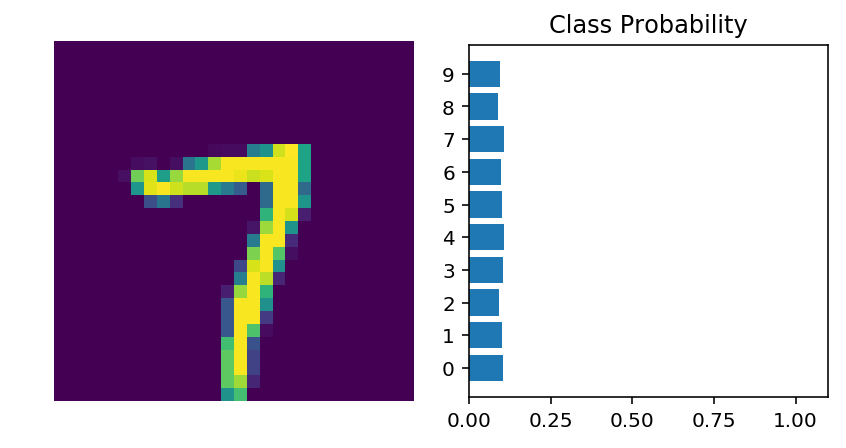

In [28]:
# example 2: let's try 3 different layer
# Define Hyperparameters for our network
input_size = 784
hidden_layer = [400,200,100]
outputs = 10

# Build a feed-forward network
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
                     ('fc1', nn.Linear(input_size,hidden_layer[0])),
                     ('relu1', nn.ReLU()),
                     ('fc2', nn.Linear(hidden_layer[0], hidden_layer[1])),
                     ('relu2', nn.ReLU()),
                     ('fc3', nn.Linear(hidden_layer[1], hidden_layer[2])),
                     ('relu3', nn.ReLU()),
                     ('output', nn.Linear(hidden_layer[2], outputs)),
                     ('softmax', nn.Softmax(dim=1))]))

print(model)

# forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], images.shape[1], images.shape[2]*images.shape[3])

ps = model.forward(images[0])

# look at the image
helper.view_classify(images[0].view(1, 28, 28), ps)


### Note: 

Class probability has nothing to predict, because we haven't train the model yet! Next part, we are going to train the network.